# LIBRARIES

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [2]:
train=pd.read_csv("Train_data.csv")
test=pd.read_csv("Test_data.csv")

In [3]:
print(train.head(2))
print("Training data has",train.shape[0],"rows & ",train.shape[1],"columns")

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   
1                   0.0                       0.0                  0.00   

   dst_host_srv_rerror_rate  

In [4]:
print(test.head(2))
print("Training data has",test.shape[0],"rows & ",test.shape[1],"columns")

   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           tcp  private  REJ          0          0     0   
1         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.0                          0.0   
1                          0.0                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   1.0   
1                   0.0                       0.0                   1.0   

   dst_host_srv_rerror_rate    c

# EXPLORATORY ANALYSIS

In [5]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
print(train.columns.values)

['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'class']


In [9]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [10]:
train.drop(['num_outbound_cmds'],axis=1,inplace=True)
test.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [11]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

# SCALING NUMERICAL ATTRIBUTES

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
 
cols=train.select_dtypes(include=['float64','int64']).columns
sc_train=scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test=scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

sc_traindf=pd.DataFrame(sc_train,columns=cols)
sc_testdf=pd.DataFrame(sc_test,columns=cols)

In [13]:
sc_traindf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


In [14]:
sc_traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   src_bytes                    25192 non-null  float64
 2   dst_bytes                    25192 non-null  float64
 3   land                         25192 non-null  float64
 4   wrong_fragment               25192 non-null  float64
 5   urgent                       25192 non-null  float64
 6   hot                          25192 non-null  float64
 7   num_failed_logins            25192 non-null  float64
 8   logged_in                    25192 non-null  float64
 9   num_compromised              25192 non-null  float64
 10  root_shell                   25192 non-null  float64
 11  su_attempted                 25192 non-null  float64
 12  num_root                     25192 non-null  float64
 13  num_file_creatio

# ENCODING CATEGORICAL ATTRIBUTES

In [15]:
print('Training set:')
for i in train.columns:
    if train[i].dtypes=='object' :
        un=len(train[i].unique())
        print("Feature",i,"has",un,"categories")

Training set:
Feature protocol_type has 3 categories
Feature service has 66 categories
Feature flag has 11 categories
Feature class has 2 categories


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

cattrain=train.select_dtypes(include=['object']).copy()
cattest=test.select_dtypes(include=['object']).copy()

traincat=cattrain.apply(encoder.fit_transform)
testcat=cattest.apply(encoder.fit_transform)

enctrain=traincat.drop(['class'], axis=1)
enctest=testcat.drop(['class'], axis=1)

In [17]:
train_x=pd.concat([sc_traindf,enctrain],axis=1)
train_y=train['class']
train_x.shape

(25192, 40)

In [18]:
test_df=pd.concat([sc_testdf,enctest],axis=1)
test_y=test['class']
test_df.shape

(22544, 40)

In [19]:
train_x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9


# FEATURE SELECTION

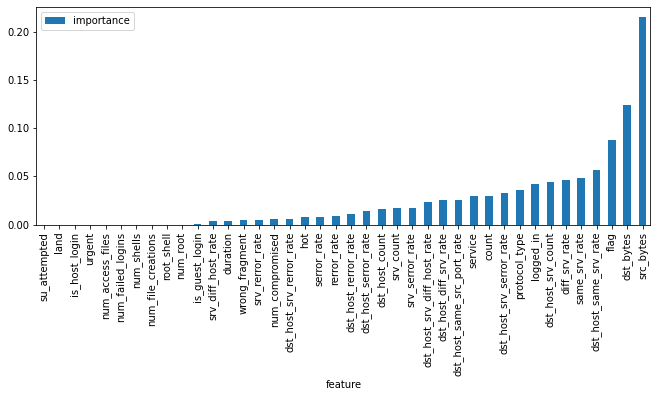

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier();

rfc.fit(train_x,train_y);
score=np.round(rfc.feature_importances_,3)
diag=pd.DataFrame({'feature':train_x.columns,'importance':score})
diag=diag.sort_values('importance').set_index('feature')

plt.rcParams['figure.figsize']=(11,4)
diag.plot.bar();

In [21]:
from sklearn.feature_selection import RFE
rfc=RandomForestClassifier()

rfe=RFE(rfc,n_features_to_select=15)
rfe=rfe.fit(train_x,train_y)

selected=train_x.columns[(rfe.get_support())]
selected

Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'protocol_type', 'service', 'flag'],
      dtype='object')

# FITTING MODEL

In [22]:
test_df=test_df[selected]
test_df.head(5)

,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type,service,flag
0,-0.021988,-0.096896,-0.890373,1.166764,-0.237191,-1.697859,-0.131492,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,1,45,1
1,-0.021988,-0.096896,-0.890373,0.443234,-0.338246,-1.770589,-0.131492,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,1,45,1
2,0.005473,-0.096896,-0.890373,-0.607053,-0.338246,0.629488,-0.363035,-0.489800,0.002934,-0.228985,1.559906,0.004234,1,19,9
3,-0.021946,-0.096896,-0.890373,-0.607053,0.380366,0.629488,-0.363035,-0.749234,0.898090,-0.410217,2.833328,3.049016,0,13,9
4,-0.021988,-0.096189,-0.890373,-0.607053,-0.259648,0.629488,-0.363035,-0.489800,-0.685647,0.360018,-0.333901,0.004234,1,55,2


In [23]:
train_x=train_x[selected]
train_x.head(5)

,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type,service,flag
0,-0.009889,-0.039310,-0.807626,-0.720244,-0.354628,0.772109,-0.349282,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,1,19,9
1,-0.010032,-0.039310,-0.807626,-0.624317,-0.368427,-1.320567,0.490836,-1.030895,-1.157831,2.764403,2.375620,-0.287993,2,41,9
2,-0.010093,-0.039310,-0.807626,0.334947,-0.299430,-1.388806,0.042773,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1,46,5
3,-0.009996,0.052473,1.238197,-0.694082,-0.313230,0.772109,-0.349282,1.264742,1.069663,-0.440940,-0.380894,0.073759,1,22,9
4,-0.010010,-0.034582,1.238197,-0.476067,0.059355,0.772109,-0.349282,1.264742,1.069663,-0.440940,-0.478183,-0.287993,1,22,9


# Training Different Models with Different Hyperparameters

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [25]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [26]:
accuracy=metrics.accuracy_score(test_y,knn.predict(test_df))
accuracy

0.9414034776437189

In [38]:
knn1=KNeighborsClassifier(n_neighbors=3,p=2)
knn1.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,knn1.predict(test_df))
accuracy

0.9348385379701917

In [35]:
knn2=KNeighborsClassifier(n_neighbors=7,weights='distance',p=1)
knn2.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,knn2.predict(test_df))
accuracy

0.9387863733144074

In [37]:
knn3=KNeighborsClassifier(n_jobs=-1,p=2)
knn3.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,knn3.predict(test_df))
accuracy

0.9414034776437189

In [49]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [50]:
lr.fit(train_x,train_y);

In [51]:
accuracy=metrics.accuracy_score(test_y,lr.predict(test_df))
accuracy

0.8880855216465579

In [43]:
lr1=LogisticRegression(solver='sag',random_state=1)
lr1.fit(train_x,train_y);
accuracy=metrics.accuracy_score(test_y,lr1.predict(test_df))
accuracy

0.8895493257629524

In [54]:
lr2=LogisticRegression(class_weight='balanced',max_iter=10)
lr2.fit(train_x,train_y);
accuracy=metrics.accuracy_score(test_y,lr2.predict(test_df))
accuracy

0.8787260468417317

In [88]:
#Decision Tree 
from sklearn import tree
dt=tree.DecisionTreeClassifier()

In [89]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [90]:
accuracy=metrics.accuracy_score(test_y,dt.predict(test_df))
accuracy

0.7305713271823988

In [91]:
dt1=tree.DecisionTreeClassifier(criterion='entropy')
dt1.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,dt1.predict(test_df))
accuracy

0.7033800567778566

In [92]:
dt3=tree.DecisionTreeClassifier(max_features='auto')
dt3.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,dt3.predict(test_df))
accuracy

0.7732434350603264

In [93]:
dt4=tree.DecisionTreeClassifier(max_features='log2')
dt4.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,dt4.predict(test_df))
accuracy

0.7638839602555003

In [94]:
dt5=tree.DecisionTreeClassifier(max_depth=7)
dt5.fit(train_x,train_y)
accuracy=metrics.accuracy_score(test_y,dt5.predict(test_df))
accuracy

0.7186834634492548

In [63]:
import io
from io import StringIO
import imageio
import pydotplus
from sklearn.tree import export_graphviz

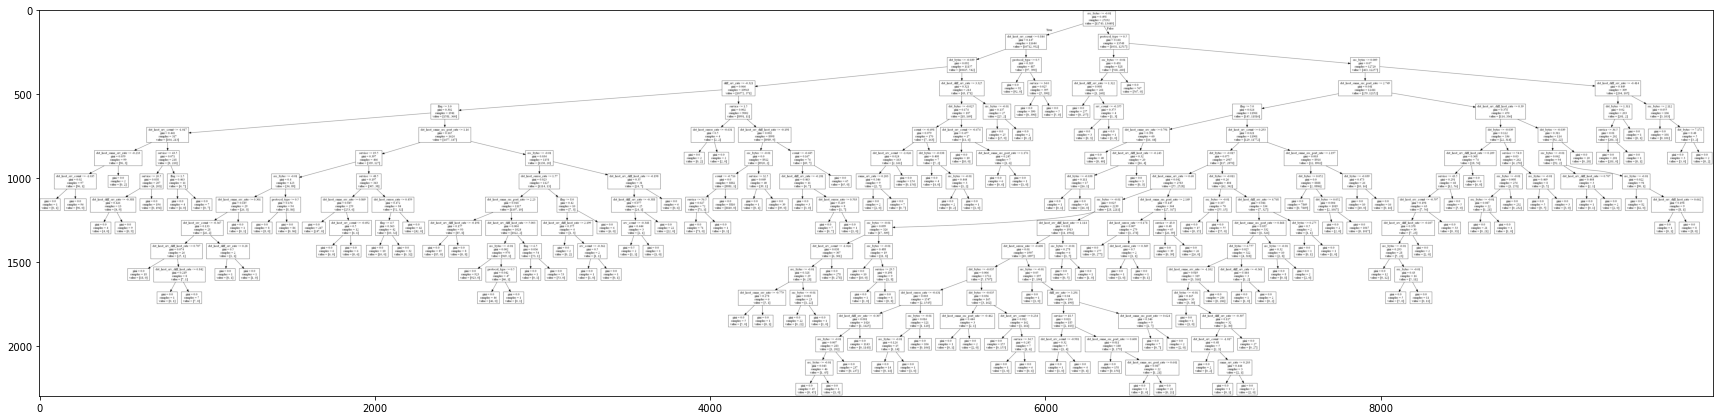

In [64]:
path='dtree.png'
f=io.StringIO()
export_graphviz(dt,out_file=f,feature_names=selected)
pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
img=imageio.imread(path)
plt.rcParams["figure.figsize"]=(30,30)
plt.imshow(img)

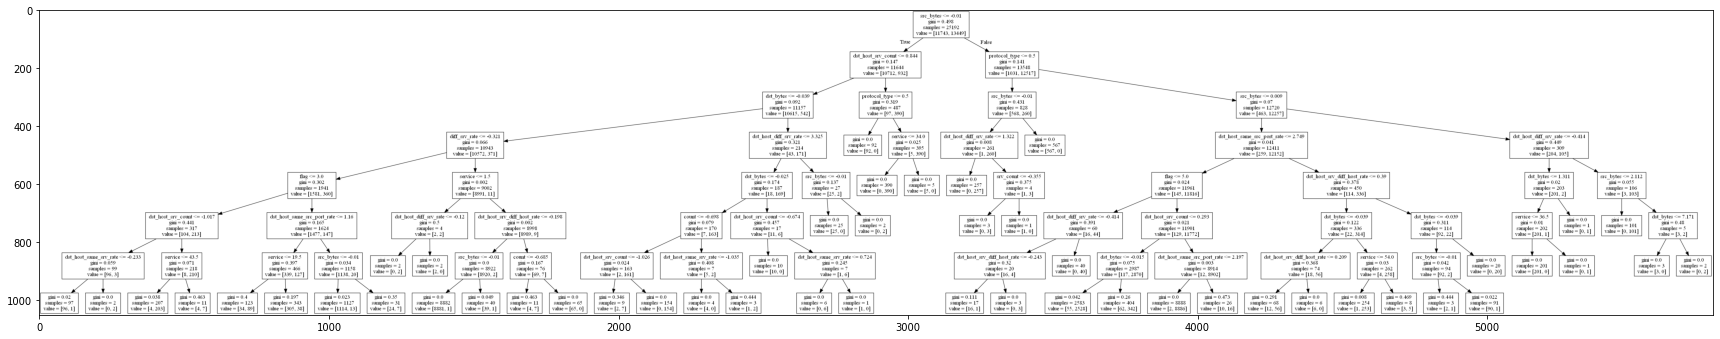

In [66]:
path='dtree2.png'
f=io.StringIO()
export_graphviz(dt5,out_file=f,feature_names=selected)
pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
img=imageio.imread(path)
plt.rcParams["figure.figsize"]=(30,30)
plt.imshow(img)

# Evaluating and Comparing the Models

In [71]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,train_x,train_y,cv=10)
print("Cross Validation Mean Score: \n",scores.mean())

Cross Validation Mean Score: 
 0.9896792629980403


In [72]:
accuracy=metrics.accuracy_score(test_y,knn.predict(test_df))
print("Accuracy: \n",accuracy)

Accuracy: 
 0.9414034776437189


In [73]:
confusion_matrix=metrics.confusion_matrix(test_y,knn.predict(test_df))
print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[ 8256   674]
 [  647 12967]]


In [74]:
classification=metrics.classification_report(test_y,knn.predict(test_df))
print("Classification report:\n",classification)

Classification report:
               precision    recall  f1-score   support

     anomaly       0.93      0.92      0.93      8930
      normal       0.95      0.95      0.95     13614

    accuracy                           0.94     22544
   macro avg       0.94      0.94      0.94     22544
weighted avg       0.94      0.94      0.94     22544



In [80]:
def perf(yt,yp):
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range(len(yp)): 
        if yt.iat[i]==yp[i]=='anomaly':
            TP+=1
        if yp[i]=='anomaly' and yt.iat[i]!=yp[i]:
            FP+=1
        if yt.iat[i]==yp[i]=='normal':
            TN+=1
        if yp[i]=='normal' and yt.iat[i]!=yp[i]:
            FN+=1
    return(TP,FP,TN,FN)

In [81]:
TP,FP,TN,FN=perf(test_y,knn.predict(test_df))

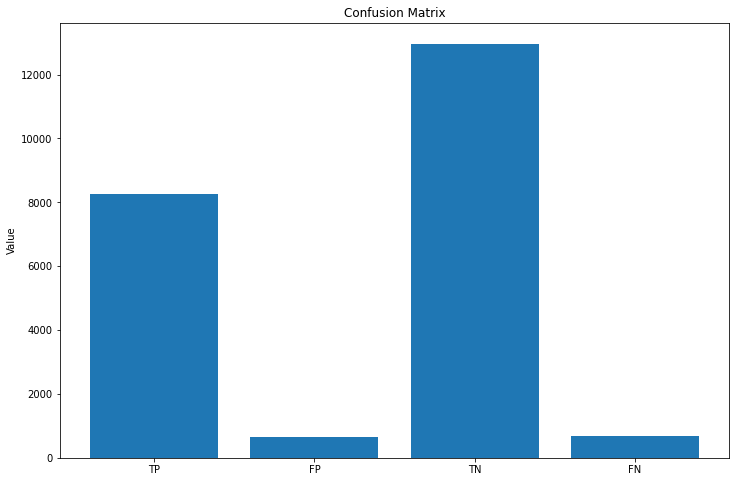

In [82]:
fig=plt.subplots(figsize=(12,8))
v=[TP,FP,TN,FN]
br=np.arange(len(v))
 
plt.bar(br,v)
plt.ylabel('Value')
plt.xticks([r for r in range(len(v))],['TP','FP','TN','FN'])
plt.title("Confusion Matrix")
plt.show()

In [67]:
scores=cross_val_score(lr,train_x,train_y,cv=10)
print("Cross Validation Mean Score: \n",scores.mean())

Cross Validation Mean Score: 
 0.9475631391897767


In [68]:
confusion_matrix=metrics.confusion_matrix(test_y,lr.predict(test_df))
print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[ 7841  1089]
 [ 1434 12180]]


In [69]:
classification=metrics.classification_report(test_y,lr.predict(test_df))
print("Classification report:\n",classification)

Classification report:
               precision    recall  f1-score   support

     anomaly       0.85      0.88      0.86      8930
      normal       0.92      0.89      0.91     13614

    accuracy                           0.89     22544
   macro avg       0.88      0.89      0.88     22544
weighted avg       0.89      0.89      0.89     22544



In [83]:
TP,FP,TN,FN=perf(test_y,lr.predict(test_df))

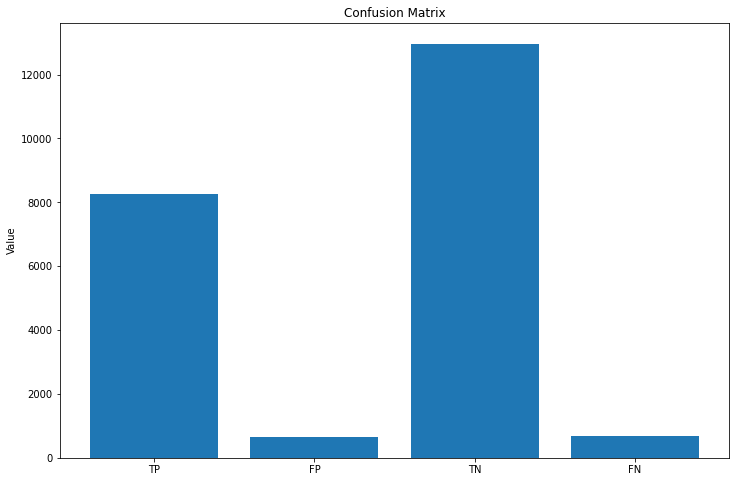

In [84]:
fig=plt.subplots(figsize=(12,8)) 
plt.bar(br,v)
plt.ylabel('Value')
plt.xticks([r for r in range(len(v))],['TP','FP','TN','FN'])
plt.title("Confusion Matrix")
plt.show()

In [95]:
scores=cross_val_score(dt3,train_x,train_y,cv=10)
print("Cross Validation Mean Score: \n",scores.mean())

Cross Validation Mean Score: 
 0.9932519045728654


In [96]:
confusion_matrix=metrics.confusion_matrix(test_y,dt3.predict(test_df))
print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[7766 1164]
 [3948 9666]]


In [97]:
classification=metrics.classification_report(test_y,dt3.predict(test_df))
print("Classification report:\n",classification)

Classification report:
               precision    recall  f1-score   support

     anomaly       0.66      0.87      0.75      8930
      normal       0.89      0.71      0.79     13614

    accuracy                           0.77     22544
   macro avg       0.78      0.79      0.77     22544
weighted avg       0.80      0.77      0.78     22544



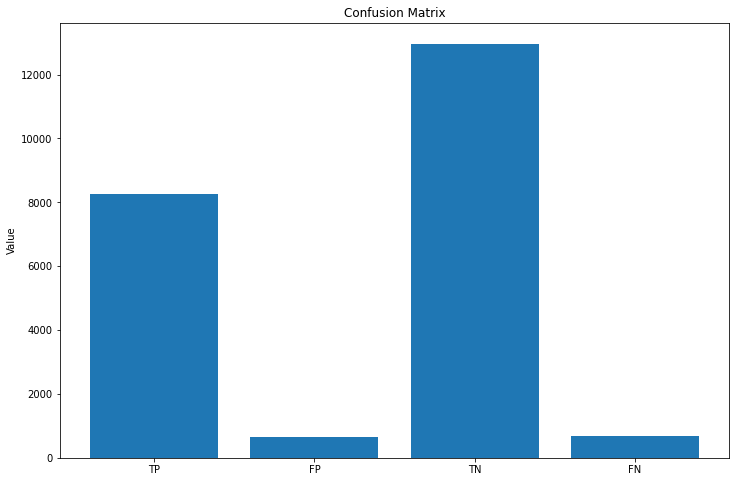

In [98]:
TP,FP,TN,FN=perf(test_y,dt3.predict(test_df))
fig=plt.subplots(figsize=(12,8)) 
plt.bar(br,v)
plt.ylabel('Value')
plt.xticks([r for r in range(len(v))],['TP','FP','TN','FN'])
plt.title("Confusion Matrix")
plt.show()